In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [16]:
hourly_data = pd.read_csv('hour.csv')

In [17]:
# print some generic statistics about the data
print(f"Shape of data: {hourly_data.shape}")
print(f"Number of missing values in the data:\
{hourly_data.isnull().sum().sum()}")

Shape of data: (17379, 17)
Number of missing values in the data:0


In [18]:
hourly_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [20]:
# create a copy of the original data
preprocessed_data = hourly_data.copy()

In [21]:
# transform seasons
seasons_mapping = {1: 'winter', 2: 'spring',3: 'summer', 4: 'fall'}

preprocessed_data['season'] = preprocessed_data['season'].apply(lambda x: seasons_mapping[x])


# transform yr
yr_mapping = {0: 2011, 1: 2012}

preprocessed_data['yr'] = preprocessed_data['yr'].apply(lambda x: yr_mapping[x])


# transform weekday
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', \
                   3: 'Wednesday', 4: 'Thursday', 5: 'Friday', \
                   6: 'Saturday'}
preprocessed_data['weekday'] = preprocessed_data['weekday']\
                               .apply(lambda x: weekday_mapping[x])

In [22]:
# transform weathersit
weather_mapping = {1: 'clear', 2: 'cloudy', \
                   3: 'light_rain_snow', 4: 'heavy_rain_snow'}
preprocessed_data['weathersit'] = preprocessed_data['weathersit'].apply(lambda x: weather_mapping[x])

In [23]:
# transform hum and windspeed
preprocessed_data['hum'] = preprocessed_data['hum']*100
preprocessed_data['windspeed'] = preprocessed_data['windspeed']\
                                 *67

In [24]:
# visualize preprocessed columns
cols = ['season', 'yr', 'weekday', \
        'weathersit', 'hum', 'windspeed']
preprocessed_data[cols].sample(10, random_state=123)

,season,yr,weekday,weathersit,hum,windspeed
5792,summer,2011,Saturday,clear,74.0,8.9981
7823,fall,2011,Sunday,clear,43.0,31.0009
15426,fall,2012,Tuesday,cloudy,77.0,6.0032
15028,fall,2012,Sunday,clear,51.0,22.0028
12290,spring,2012,Friday,cloudy,89.0,12.9980
3262,spring,2011,Friday,clear,64.0,7.0015
10763,spring,2012,Thursday,clear,42.0,23.9994
12384,spring,2012,Tuesday,light_rain_snow,82.0,11.0014
6051,summer,2011,Wednesday,clear,52.0,19.0012
948,winter,2011,Saturday,clear,80.0,0.0000


In [25]:
"""
assert that total number of rides is equal to the sum of registered and 
casual ones
"""
assert (preprocessed_data.casual \
        + preprocessed_data.registered \
        == preprocessed_data.cnt).all(), \
       'Sum of casual and registered rides not equal '\
 'to total number of rides'

C:\Users\aa351\AppData\Local\Temp\ipykernel_5472\1005224936.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preprocessed_data['registered'], label='registered')
C:\Users\aa351\AppData\Local\Temp\ipykernel_5472\1005224936.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preprocessed_data['

Text(0.5, 1.0, 'Rides distributions')

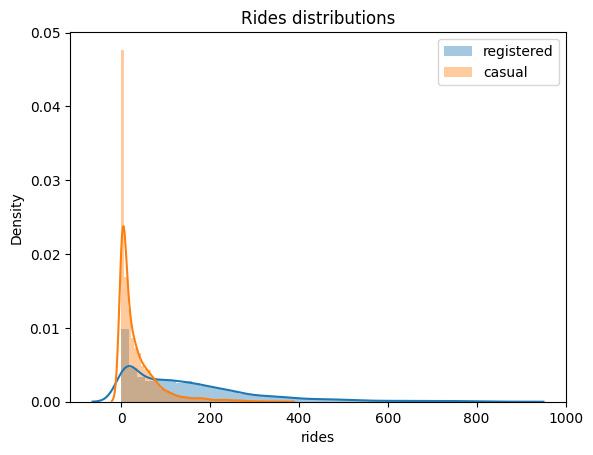

In [26]:
# plot distributions of registered vs casual rides
sns.distplot(preprocessed_data['registered'], label='registered')
sns.distplot(preprocessed_data['casual'], label='casual')
plt.legend()
plt.xlabel('rides')
plt.title("Rides distributions")


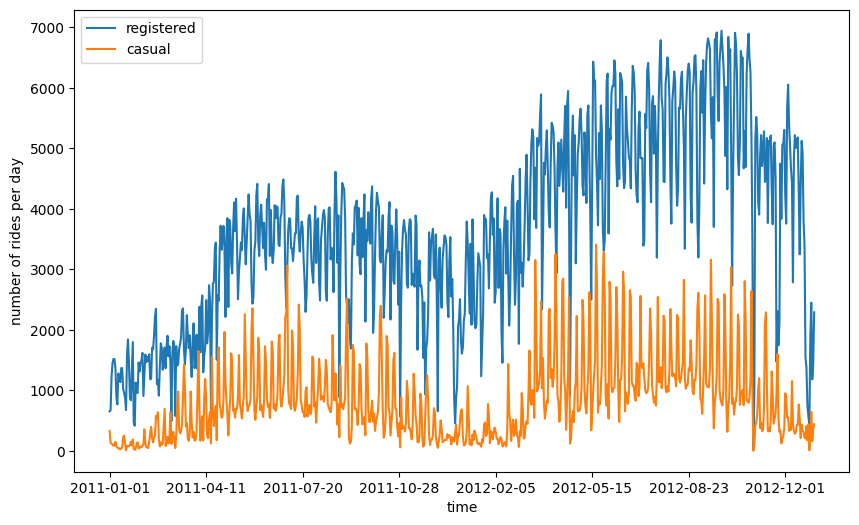

In [27]:
# plot evolution of rides over time
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(10,6))
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");

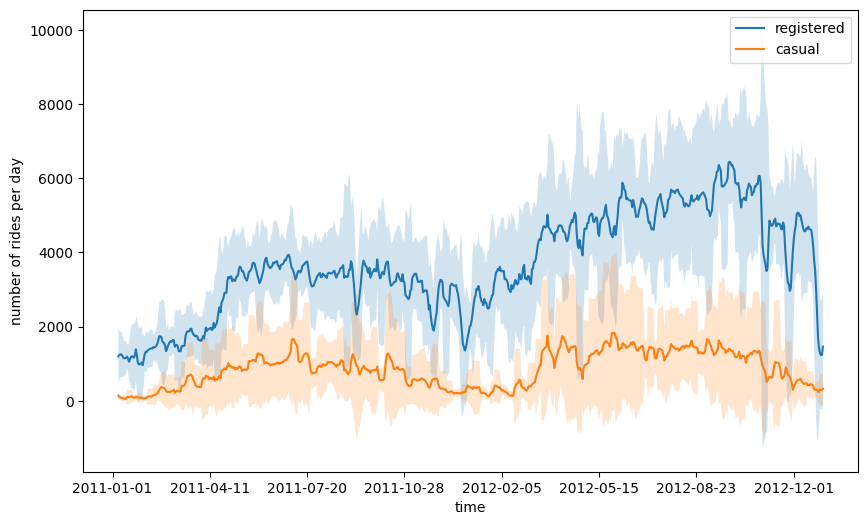

In [38]:
"""
Create new dataframe with necessary for plotting columns, and obtain 
number of rides per day, by grouping over each day
"""
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()
"""
define window for computing the rolling mean and standard deviation
"""
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()
"""
Create a plot of the series, where we first plot the series of rolling 
means, then we color the zone between the series of rolling means +- 2 
rolling standard deviations
"""
ax = rolling_means.plot(figsize=(10,6))
ax.fill_between(rolling_means.index, rolling_means['registered'] \
                + 2*rolling_deviations['registered'], \
                rolling_means['registered'] \
                - 2*rolling_deviations['registered'], \
                alpha = 0.2)
ax.fill_between(rolling_means.index, rolling_means['casual'] \
                + 2*rolling_deviations['casual'], \
                rolling_means['casual'] \
                - 2*rolling_deviations['casual'], \
                alpha = 0.2)
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");


C:\Users\aa351\ds working area\ds\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\aa351\ds working area\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


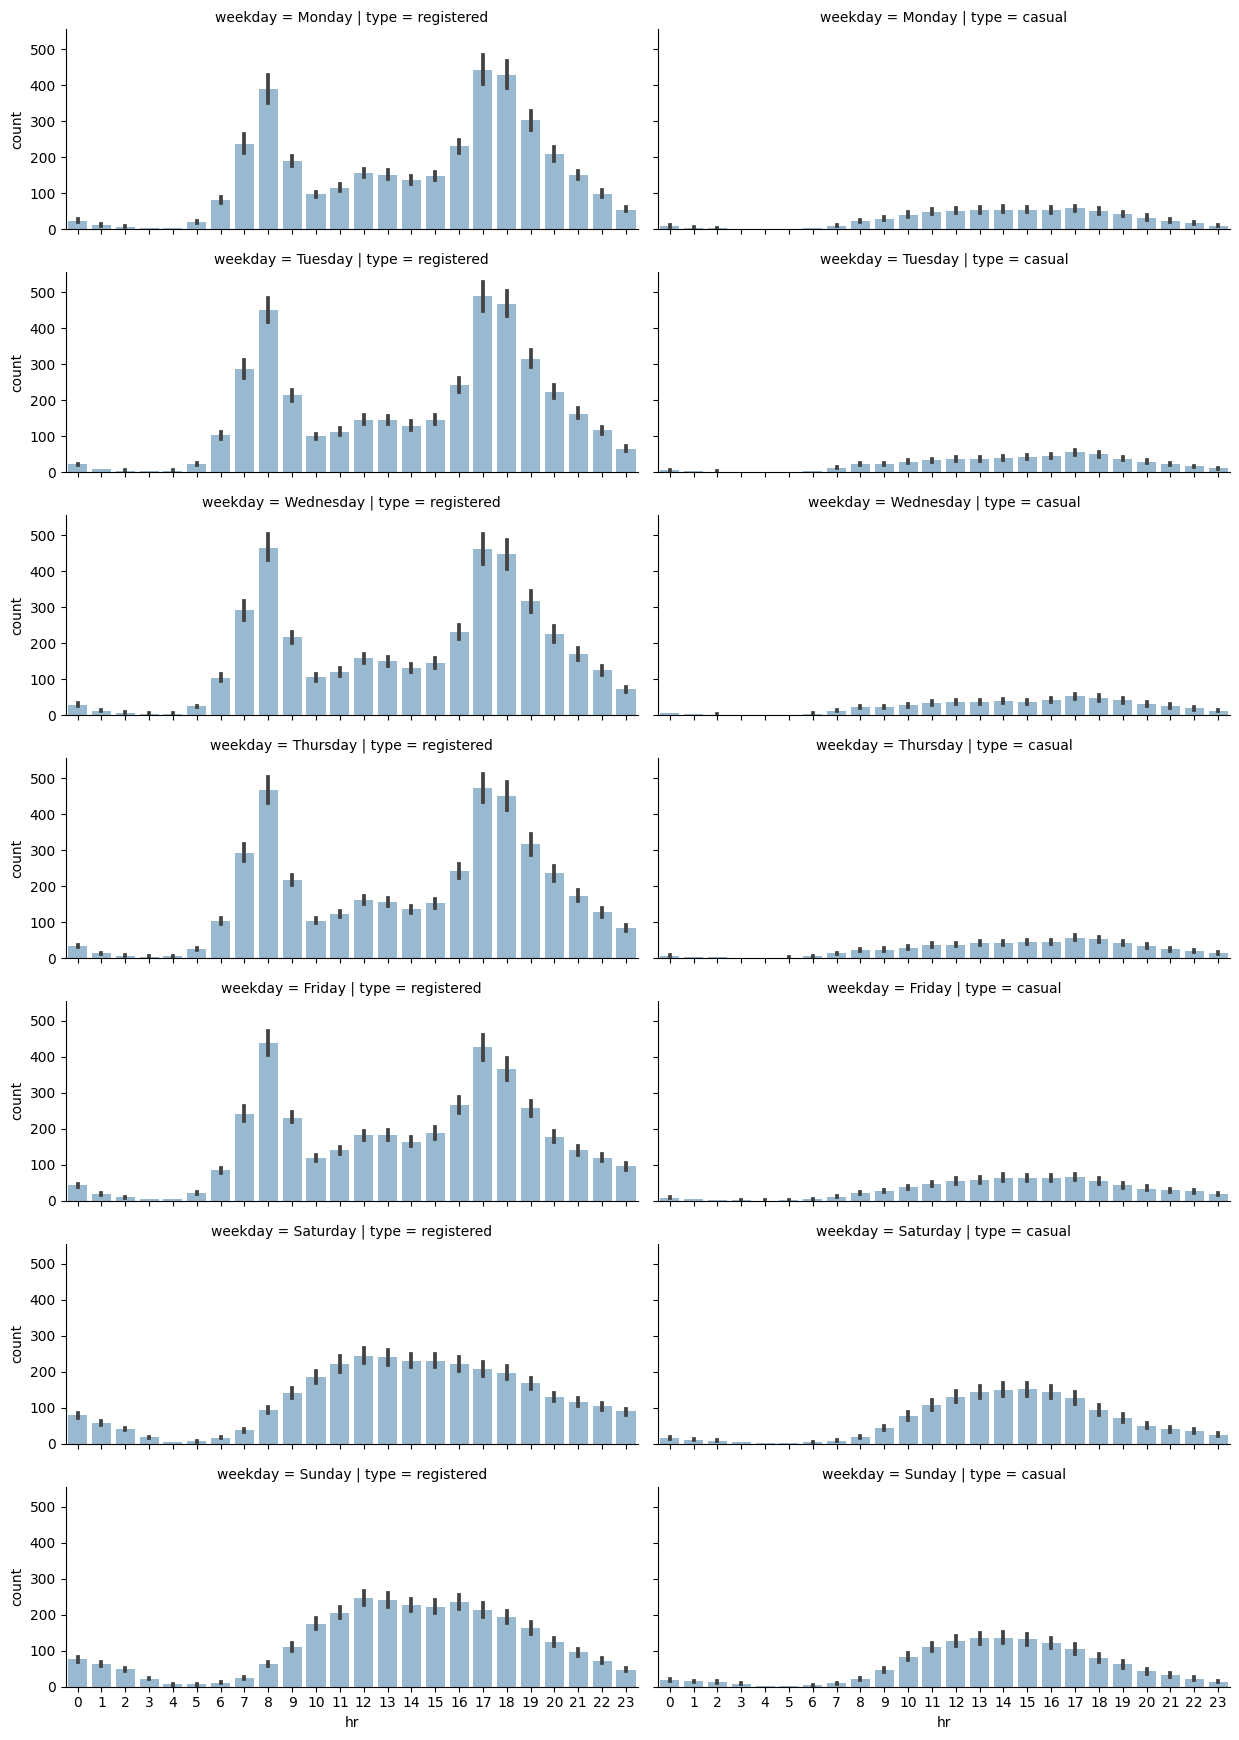

In [44]:
# select relevant columns
plot_data = preprocessed_data[['hr', 'weekday', 'registered', 'casual']]
"""
transform the data into a format, in number of entries are computed as 
count, 
for each distinct hr, weekday and type (registered or casual)
"""
plot_data = plot_data.melt(id_vars=['hr', 'weekday'], \
                           var_name='type', value_name='count')
"""
create FacetGrid object, in which a grid plot is produced.
As columns, we have the various days of the week,
as rows, the different types (registered and casual)
"""
grid = sns.FacetGrid(plot_data, row='weekday', \
                     col='type', height=2.5, aspect=2.5, \
                     row_order=['Monday', 'Tuesday', \
                                'Wednesday', 'Thursday', \
'Friday', 'Saturday', 'Sunday'])
# populate the FacetGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)

In [41]:
plot_data 

,hr,weekday,type,count
0,0,Saturday,registered,13
1,1,Saturday,registered,32
2,2,Saturday,registered,27
3,3,Saturday,registered,10
4,4,Saturday,registered,1
...,...,...,...,...
34753,19,Monday,casual,11
34754,20,Monday,casual,8
34755,21,Monday,casual,7
34756,22,Monday,casual,13


In [45]:
# select subset of the data
plot_data = preprocessed_data[['hr', 'season', \
                               'registered', 'casual']]

In [46]:
# unpivot data from wide to long format
plot_data = plot_data.melt(id_vars=['hr', 'season'], \
                           var_name='type', value_name='count')

C:\Users\aa351\ds working area\ds\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\aa351\ds working area\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


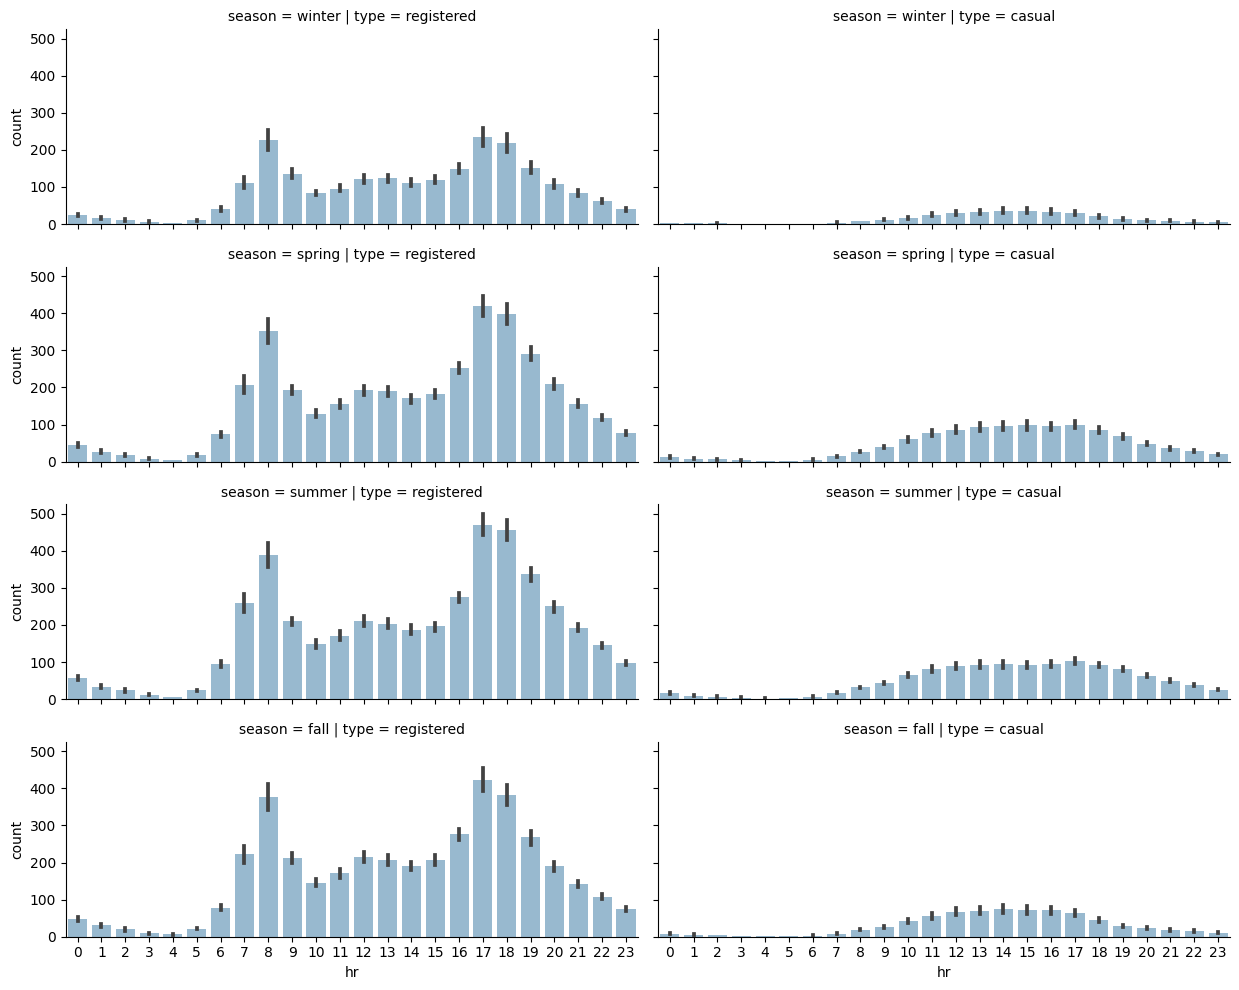

In [49]:
# define FacetGrid
grid = sns.FacetGrid(plot_data, row='season', \
                     col='type', height=2.5, \
                     aspect=2.5, \
                     row_order=['winter', 'spring', \
                                'summer', 'fall'])

# apply plotting function to each element in the grid
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
# save figure


C:\Users\aa351\ds working area\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


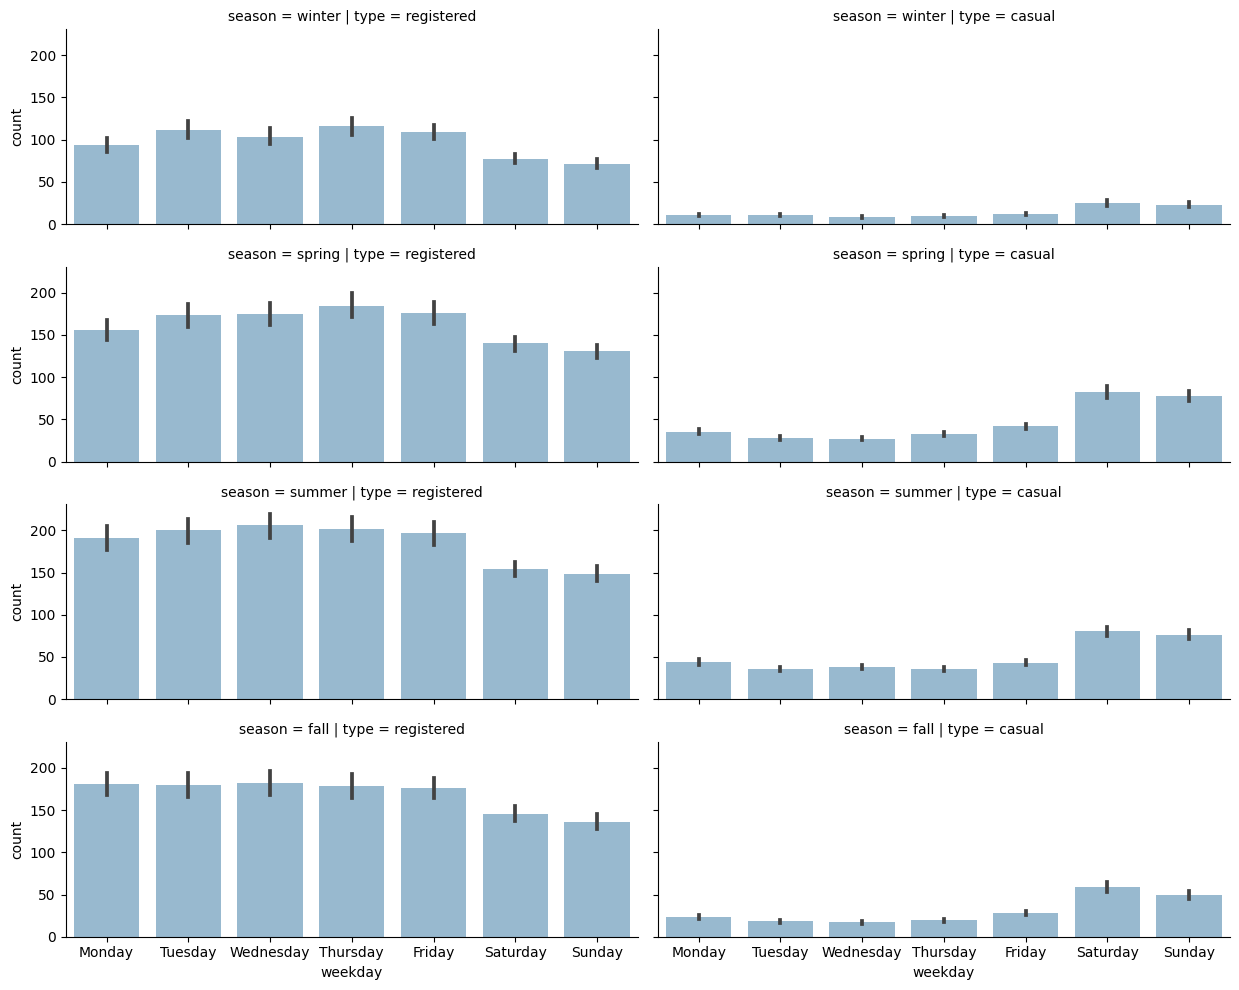

In [50]:
plot_data = preprocessed_data[['weekday', 'season', \
                               'registered', 'casual']]
plot_data = plot_data.melt(id_vars=['weekday', 'season'], \
                           var_name='type', value_name='count')
grid = sns.FacetGrid(plot_data, row='season', col='type', \
                     height=2.5, aspect=2.5, \
                     row_order=['winter', 'spring', \
                                'summer', 'fall'])
grid.map(sns.barplot, 'weekday', 'count', alpha=0.5, \
         order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', \
                'Friday', 'Saturday', 'Sunday'])

In [51]:
# compute population mean of registered rides
population_mean = preprocessed_data.registered.mean()


# get sample of the data (summer 2011)
sample = preprocessed_data[(preprocessed_data.season \
                            == "summer") \
                            & (preprocessed_data.yr \
                            == 2011)].registered


# perform t-test and compute p-value
from scipy.stats import ttest_1samp
test_result = ttest_1samp(sample, population_mean)
print(f"Test statistic: {test_result[0]}, \
p-value: {test_result[1]}")

Test statistic: -3.4919691483786197, p-value: 0.0004887645279519505


In [52]:
# get sample as 5% of the full data
import random
random.seed(111)
sample_unbiased = preprocessed_data.registered.sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased, \
 population_mean)
print(f"Unbiased test statistic: {test_result_unbiased[0]}, \
p-value: {test_result_unbiased[1]}")

Unbiased test statistic: 0.7566084020963941, p-value: 0.4494898122804579


In [53]:
# define mask, indicating if the day is weekend or work day
weekend_days = ['Saturday', 'Sunday']
weekend_mask = preprocessed_data.weekday.isin(weekend_days)
workingdays_mask = ~preprocessed_data.weekday.isin(weekend_days)
# select registered rides for the weekend and working days
weekend_data = preprocessed_data.registered[weekend_mask]
workingdays_data = preprocessed_data.registered[workingdays_mask]

In [54]:
# perform ttest
from scipy.stats import ttest_ind
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, \
p-value: {test_res[1]:.03f}")

Statistic value: -16.004, p-value: 0.000


C:\Users\aa351\AppData\Local\Temp\ipykernel_5472\3053742235.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weekend_data, label='weekend days')
C:\Users\aa351\AppData\Local\Temp\ipykernel_5472\3053742235.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(workingdays_data, label='working day

Text(0.5, 1.0, 'Registered rides distributions')

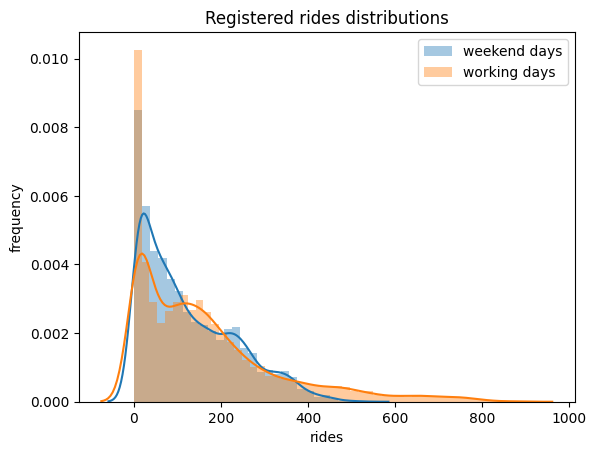

In [55]:
"""
plot distributions of registered rides for working vs weekend days
"""
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Registered rides distributions")

Statistic value: 41.077, p-value: 0.000


C:\Users\aa351\AppData\Local\Temp\ipykernel_5472\4098816312.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weekend_data, label='weekend days')
C:\Users\aa351\AppData\Local\Temp\ipykernel_5472\4098816312.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(workingdays_data, label='working da

Text(0.5, 1.0, 'Casual rides distributions')

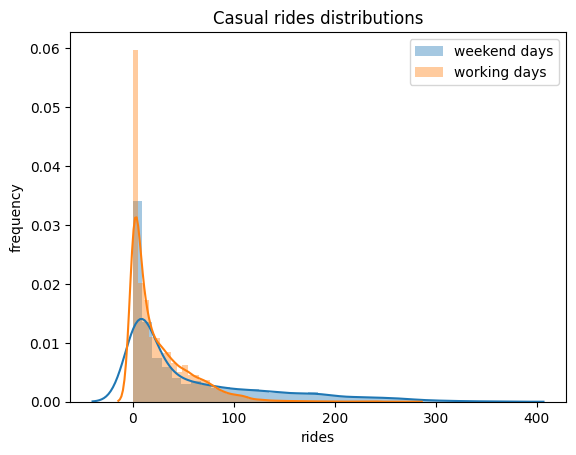

In [56]:
# select casual rides for the weekend and working days
weekend_data = preprocessed_data.casual[weekend_mask]
workingdays_data = preprocessed_data.casual[workingdays_mask]
# perform ttest
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, \
p-value: {test_res[1]:.03f}")
# plot distributions of casual rides for working vs weekend days
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Casual rides distributions")

In [60]:
def plot_correlations(data, col):
# get correlation between col and registered rides
    corr_r = np.corrcoef(data[col], data["registered"])[0,1]
    ax = sns.regplot(x=col, y="registered", data=data, \
                     scatter_kws={"alpha":0.05}, \
                     label=f"Registered rides \
                     (correlation: {corr_r:.3f})")
# get correlation between col and casual rides
    corr_c = np.corrcoef(data[col], data["casual"])[0,1]
    ax = sns.regplot(x=col, y='casual', data=data, \
                     scatter_kws={"alpha":0.05}, \
                     label=f"Casual rides (correlation: {corr_c:.3f})")
    #adjust legend alpha
    legend = ax.legend()
    for lh in legend.legendHandles:
        lh.set_alpha(0.5)
        ax.set_ylabel("rides")
        ax.set_title(f"Correlation between rides and {col}")
        return ax

C:\Users\aa351\AppData\Local\Temp\ipykernel_5472\2174009904.py:15: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


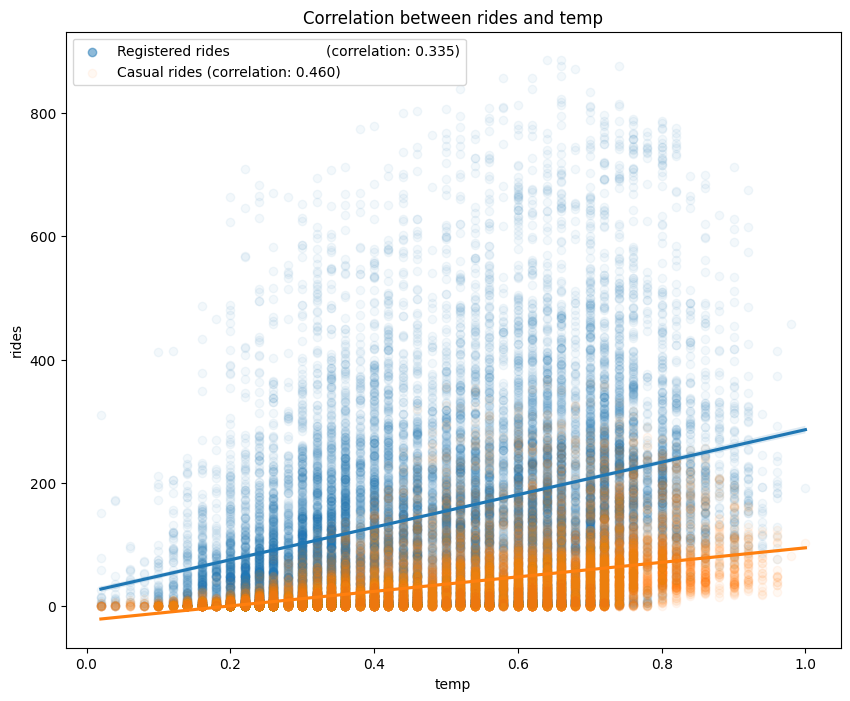

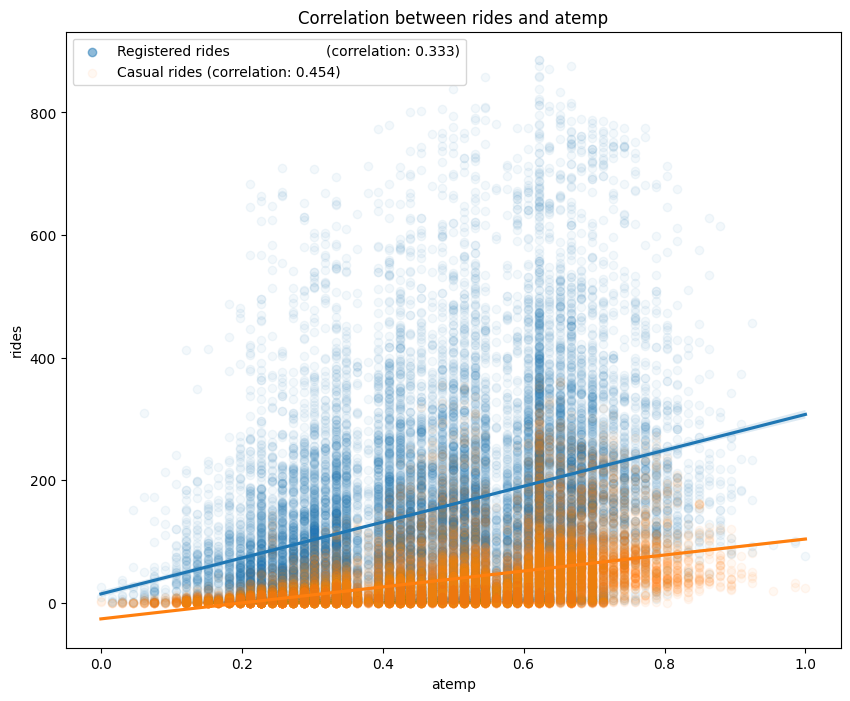

In [62]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'temp')

plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'atemp')

C:\Users\aa351\AppData\Local\Temp\ipykernel_5472\2174009904.py:15: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


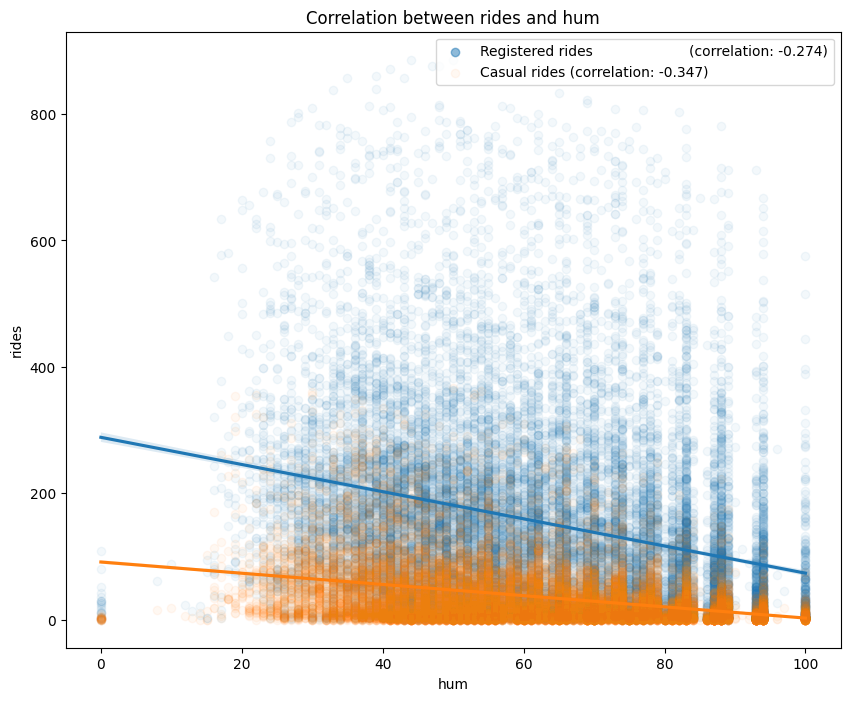

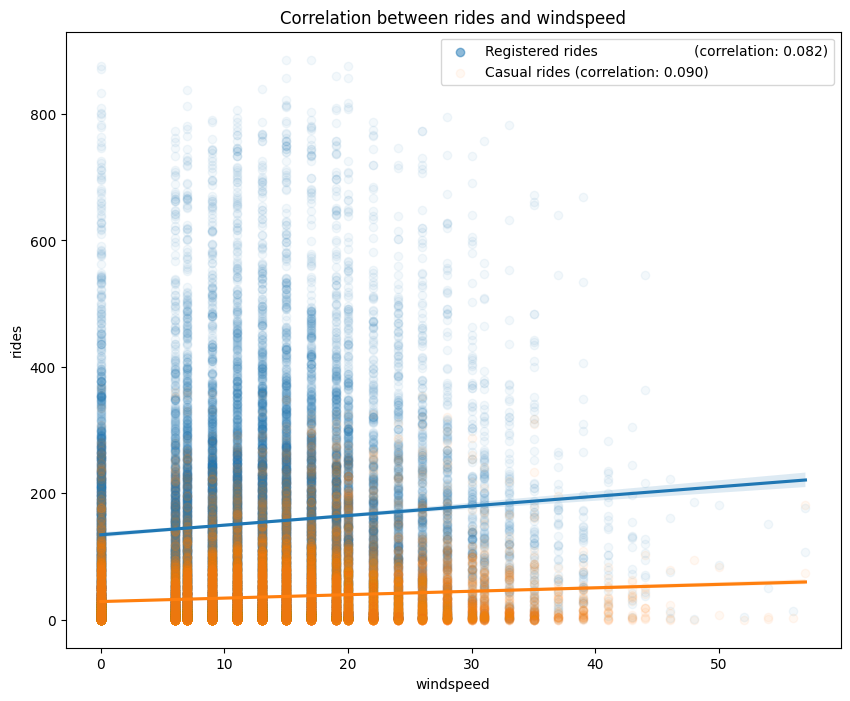

In [63]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'hum')

plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'windspeed')


In [66]:
from scipy.stats import pearsonr, spearmanr
# define function for computing correlations
def compute_correlations(data, col):
    pearson_reg = pearsonr(data[col], data["registered"])[0]
    pearson_cas = pearsonr(data[col], data["casual"])[0]
    spearman_reg = spearmanr(data[col], data["registered"])[0]
    spearman_cas = spearmanr(data[col], data["casual"])[0]
    return pd.Series({"Pearson (registered)": pearson_reg,\
                      "Spearman (registered)": spearman_reg,\
"Pearson (casual)": pearson_cas,\
"Spearman (casual)": spearman_cas})

In [67]:
# compute correlation measures between different features
cols = ["temp", "atemp", "hum", "windspeed"]
corr_data = pd.DataFrame(index=["Pearson (registered)", \
                                "Spearman (registered)",\
"Pearson (casual)", \
"Spearman (casual)"])
for col in cols:
    corr_data[col]=compute_correlations(preprocessed_data, col)
corr_data.T

,Pearson (registered),Spearman (registered),Pearson (casual),Spearman (casual)
temp,0.335361,0.373196,0.459616,0.570989
atemp,0.332559,0.373014,0.454080,0.570419
hum,-0.273933,-0.338480,-0.347028,-0.388213
windspeed,0.082321,0.122936,0.090287,0.122920


(5.5, -0.5)

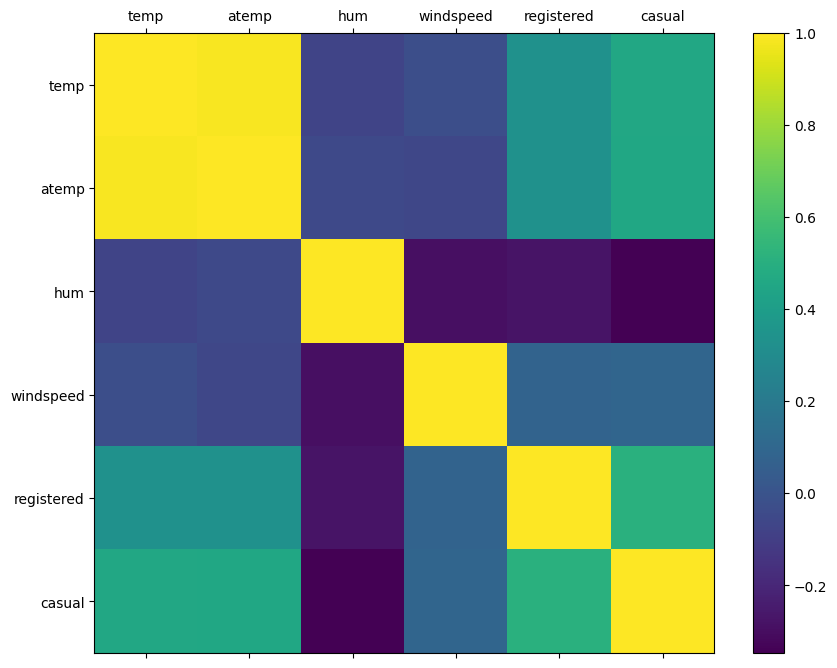

In [68]:
# plot correlation matrix
cols = ["temp", "atemp", "hum", "windspeed", \
        "registered", "casual"]
plot_data = preprocessed_data[cols]
corr = plot_data.corr()
fig = plt.figure(figsize=(10,8))
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(len(plot_data.columns)), plot_data.columns)
plt.yticks(range(len(plot_data.columns)), plot_data.columns)
plt.colorbar()
plt.ylim([5.5, -0.5])